## <font color=orange>**Machine Learning - Regression Models**</font>

### <font color=gray>**Datanin Incelenmesi ve Gorsellestirilmesi**</font>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('hw_25000.csv')
df=data.copy()

In [4]:
df.head()

Index    Height    Weight
0      1  65.78331  112.9925
1      2  71.51521  136.4873
2      3  69.39874  153.0269
3      4  68.21660  142.3354
4      5  67.78781  144.2971

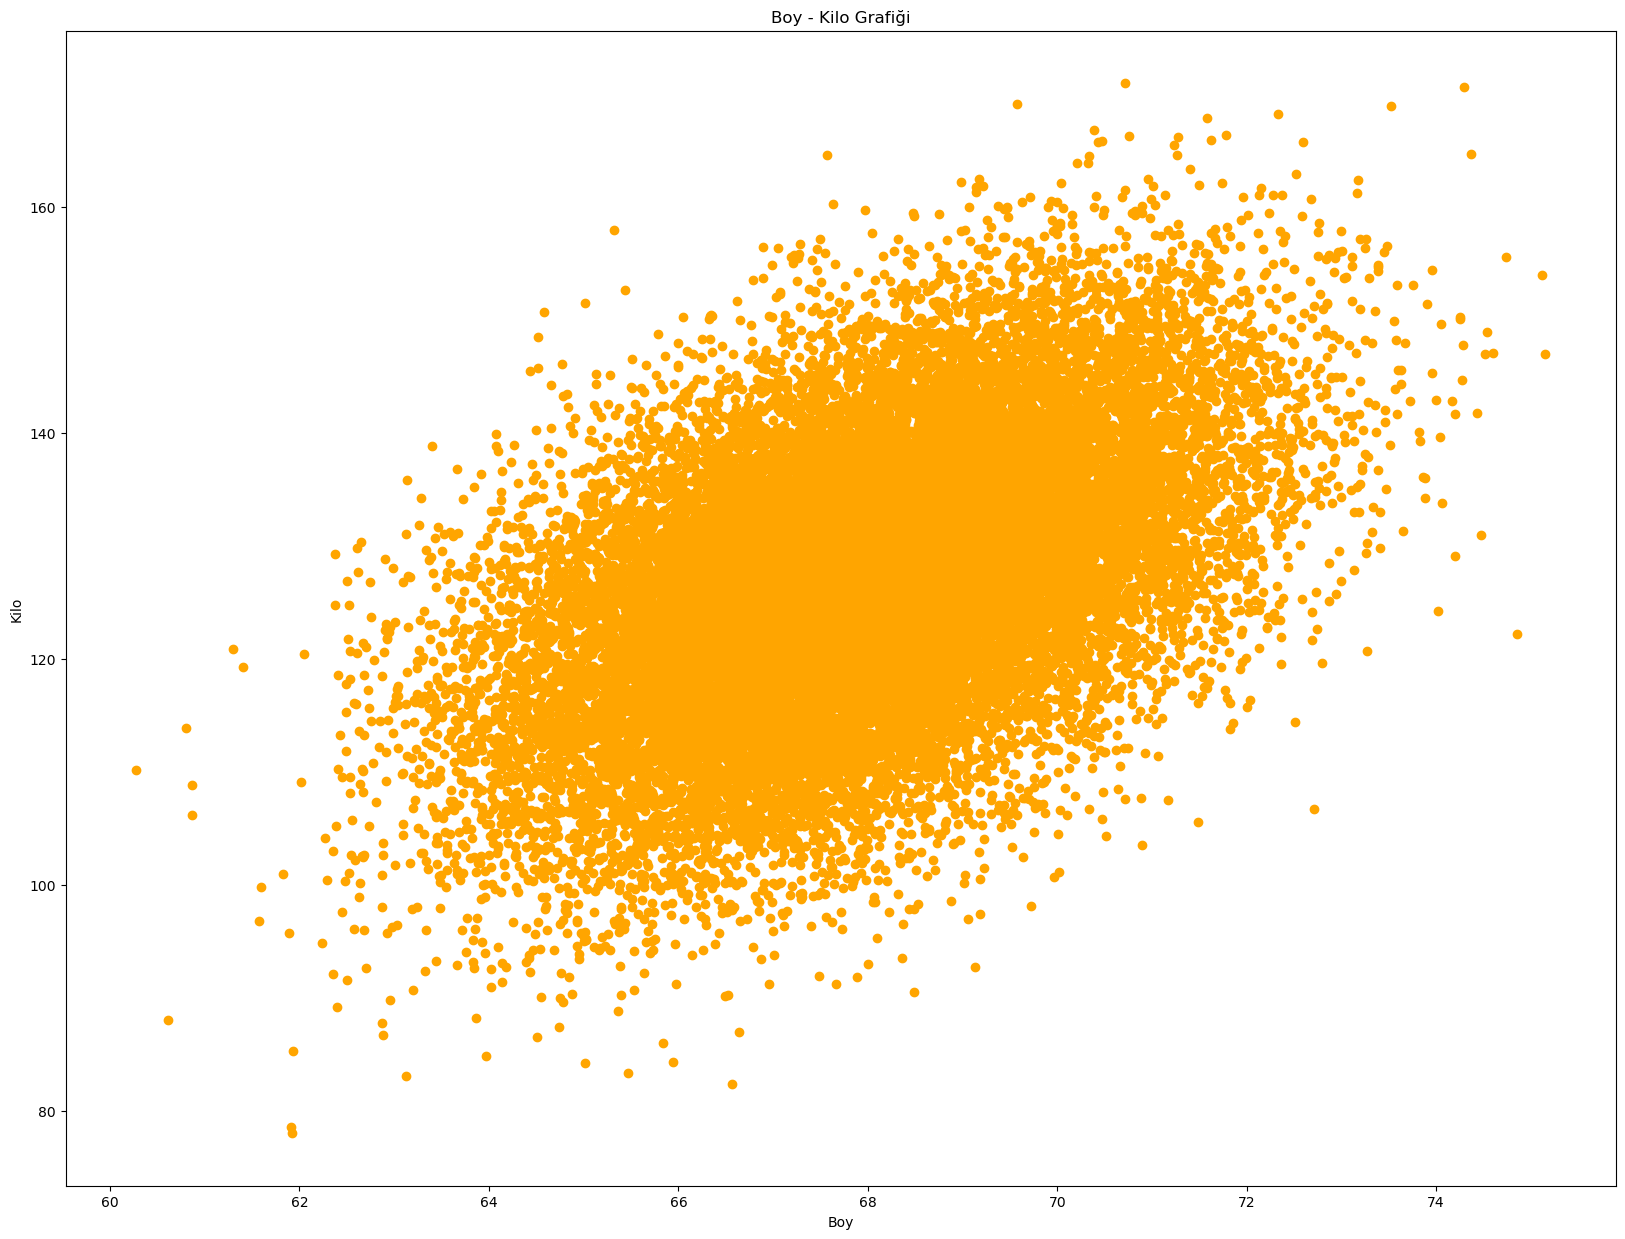

In [17]:
plt.figure(figsize=(20,15))
plt.scatter(df.Height,df.Weight,c='orange',)
plt.xlabel('Boy')
plt.ylabel('Kilo')
plt.title('Boy - Kilo Grafiği')
plt.show();

### <font color=gray>**Tahminlemenin Yapilmasi**</font>

In [18]:
from sklearn.linear_model import LinearRegression

In [34]:
boy = df.Height.values.reshape(-1,1)
kilo = df.Weight.values.reshape(-1,1)

regression = LinearRegression()
regression.fit(boy,kilo)

print(regression.predict([[71]]))

[[136.35108456]]


In [35]:
print(regression.predict([[60]]))
print(regression.predict([[62]]))
print(regression.predict([[64]]))
print(regression.predict([[66]]))

[[102.43284366]]
[[108.59979655]]
[[114.76674944]]
[[120.93370233]]


### <font color=gray>**Tahmin Degerlerinin Gorsellestirilmesi**</font>

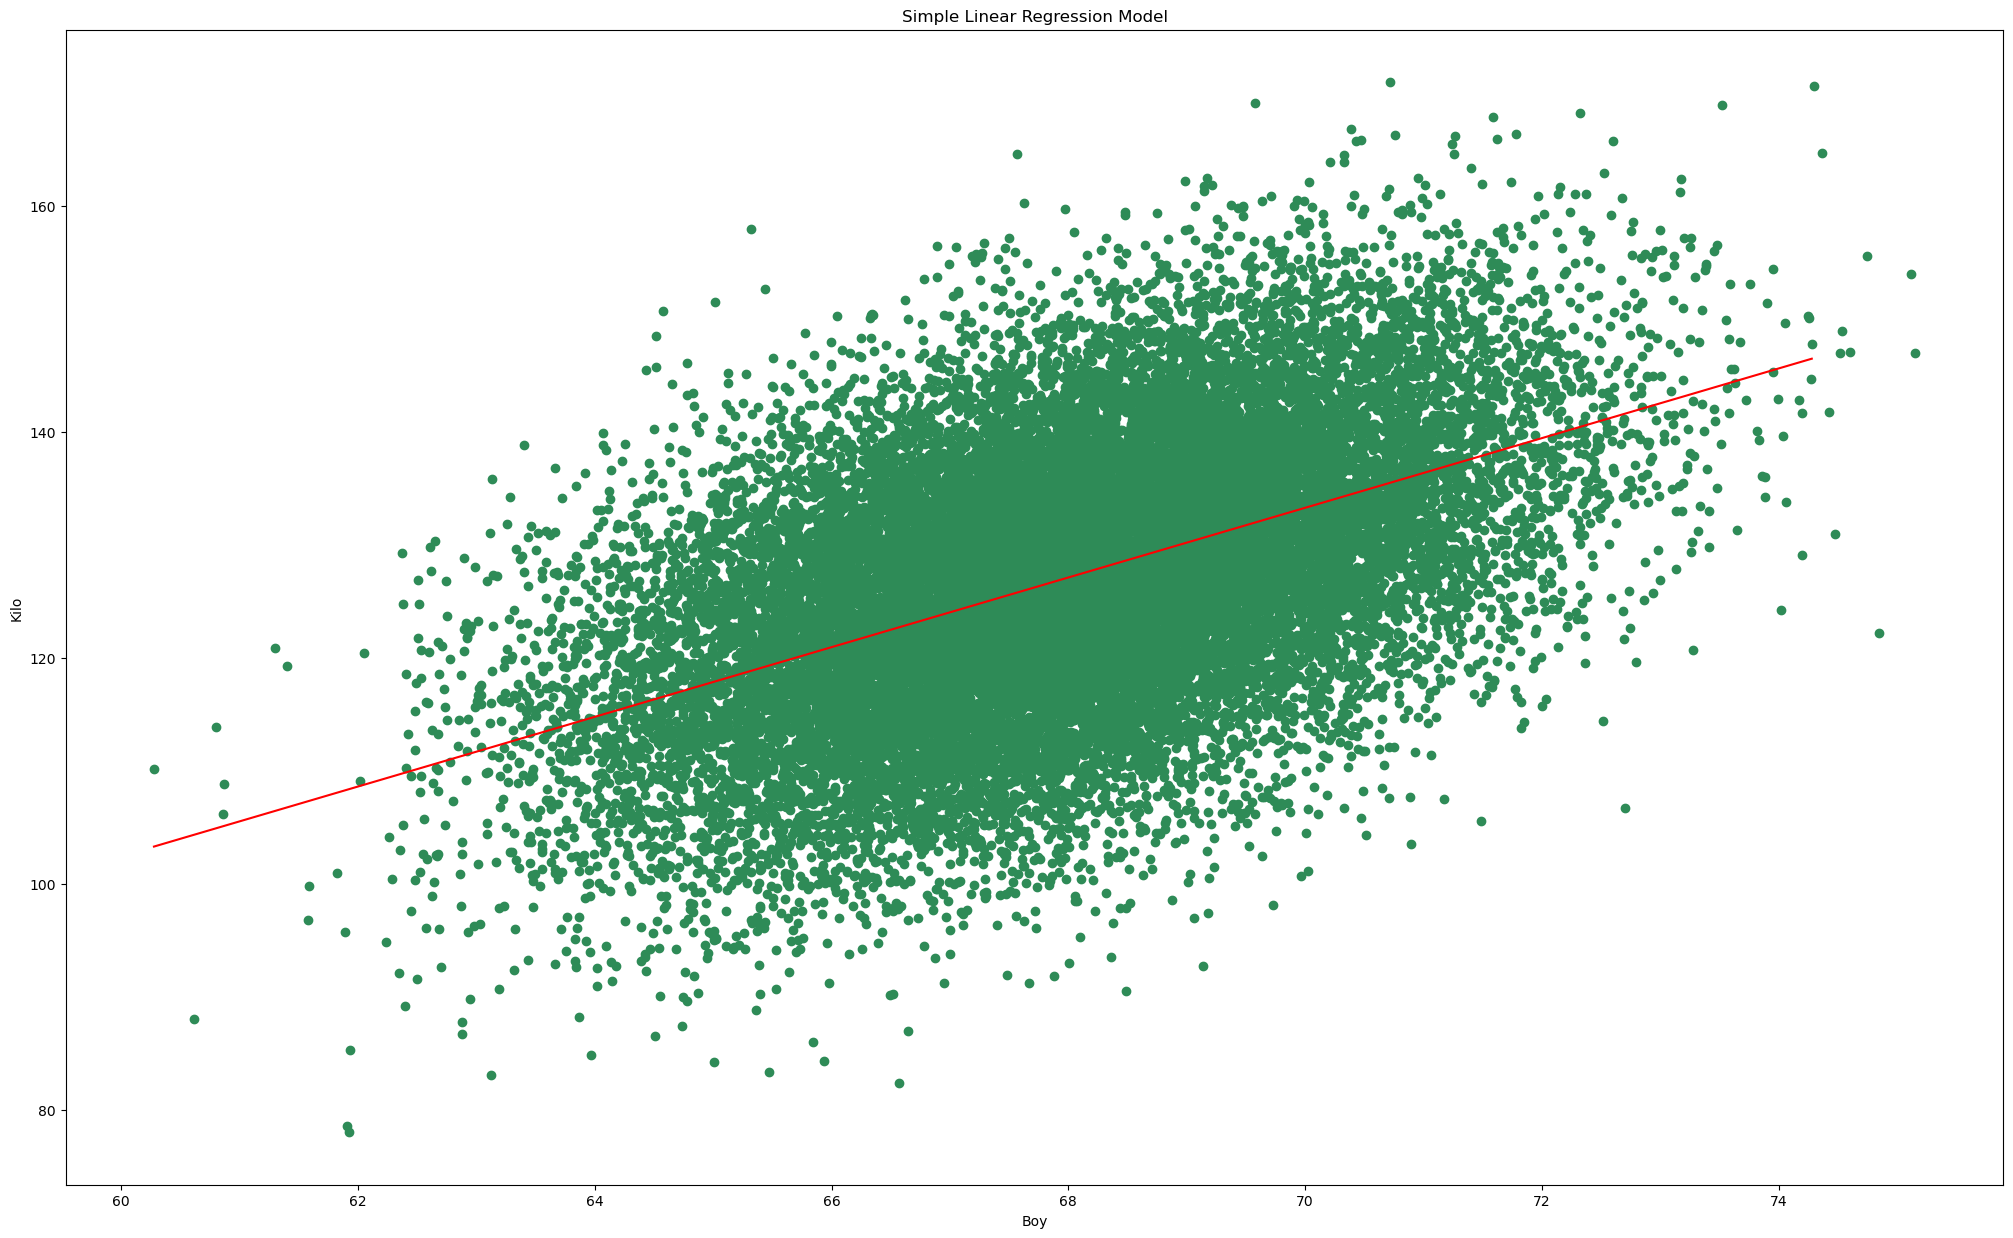

In [43]:
plt.figure(figsize=(25,15))
plt.scatter(df.Height,df.Weight,c='seagreen')
x = np.arange(min(df.Height),max(df.Height)).reshape(-1,1)
plt.plot(x,regression.predict(x),color='r')
plt.xlabel('Boy')
plt.ylabel('Kilo')
plt.title('Simple Linear Regression Model')
plt.show()

### <font color=gray>**R-Square Yontemiyle Algoritma Basarisinin Hesaplanmasi**</font>

In [42]:
from sklearn.metrics import r2_score

In [44]:
print(r2_score(kilo,regression.predict(boy)))

0.2528666917428807


### <font color=gray>**Multiple Linear Regression ile Calismak**</font>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
insurance = pd.read_csv('insurance.csv')
df = insurance.copy()

In [47]:
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [49]:
df.describe().T

count          mean           std      min        25%      50%  \
age       1338.0     39.207025     14.049960    18.00    27.0000    39.00   
bmi       1338.0     30.665471      6.098382    16.00    26.3000    30.40   
children  1338.0      1.094918      1.205493     0.00     0.0000     1.00   
expenses  1338.0  13270.422414  12110.011240  1121.87  4740.2875  9382.03   

                75%       max  
age          51.000     64.00  
bmi          34.700     53.10  
children      2.000      5.00  
expenses  16639.915  63770.43

In [64]:
#age ve bmi ye gore expenses tahminlerinin yapilmasi

In [54]:
# y - ekseni
expenses = df.expenses.values.reshape(-1,1)
# reshape(-1,1) sklearn kutuphanesiyle uyumlu hale gelmesi icin:

In [60]:
# x - ekseni
ageBmi = df.iloc[:,[0,2]].values

In [62]:
regression = LinearRegression()
regression.fit(ageBmi,expenses)

regression.predict(np.array([[20,20]]))

array([[5068.47110398]])

In [63]:
regression.predict(np.array([[20,22]]))

array([[5735.25281504]])

In [65]:
regression.predict(np.array([[30,20]]))

array([[7487.47183868]])

### <font color=gray>**Polynomial Regression Modelini Anlamak**</font>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [67]:
data = pd.read_csv('positions.csv')
df = data.copy()

In [68]:
df.head()

Position  Level  Salary
0      Software Engineer      1   22000
1  Sr. Software Engineer      2   24000
2        Technology Lead      3   30000
3            Team Leader      4   38000
4                Manager      5   50000

In [69]:
#once basit lineer olarak ele alinmasi:

In [72]:
level = df.iloc[:,1].values.reshape(-1,1)
level

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [73]:
salary = df.iloc[:,2].values.reshape(-1,1)
salary

array([[ 22000],
       [ 24000],
       [ 30000],
       [ 38000],
       [ 50000],
       [ 75000],
       [110000],
       [170000],
       [260000],
       [480000]], dtype=int64)

In [74]:
regression = LinearRegression()
regression.fit(level,salary)

tahmin = regression.predict([[8.3]])
print(tahmin)

[[239851.51515152]]


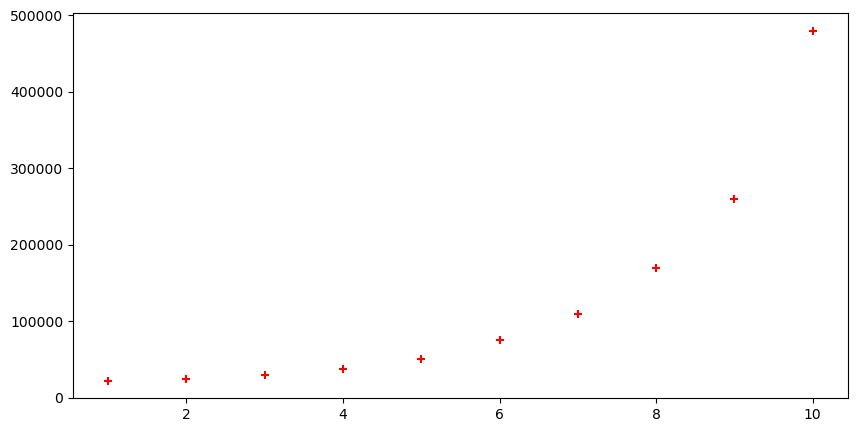

In [88]:
#Klasik lineer regresyon neden tercih edilmez?:
plt.figure(figsize=(10,5))
plt.scatter(level,salary,color='r',marker='+')
plt.show()

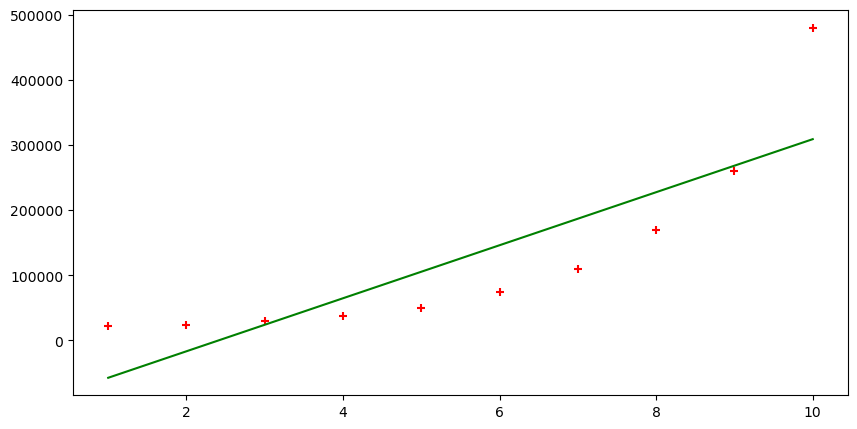

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(level,salary,color='r',marker='+')
plt.plot(level,regression.predict(level),color='green') #her level icin cizgi ciz
plt.show()

### <font color=gray>**Polynomial Regression Modelini Uygulamak**</font>

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
regressionPoly = PolynomialFeatures(degree = 4)
#degree mean square icin en detayli seviye demek oluyor.

levelPoly = regressionPoly.fit_transform(level)
#Elimizdeki levelleri polynom goruntusu haline getir.

In [99]:
regression2 = LinearRegression()
regression2.fit(levelPoly,salary)

tahmin2 = regression2.predict(regressionPoly.fit_transform([[8.3]]))
print(tahmin2) #daha mantikli sonuc verdigi goruluyor
print(tahmin)

[[189117.70166079]]
[[239851.51515152]]


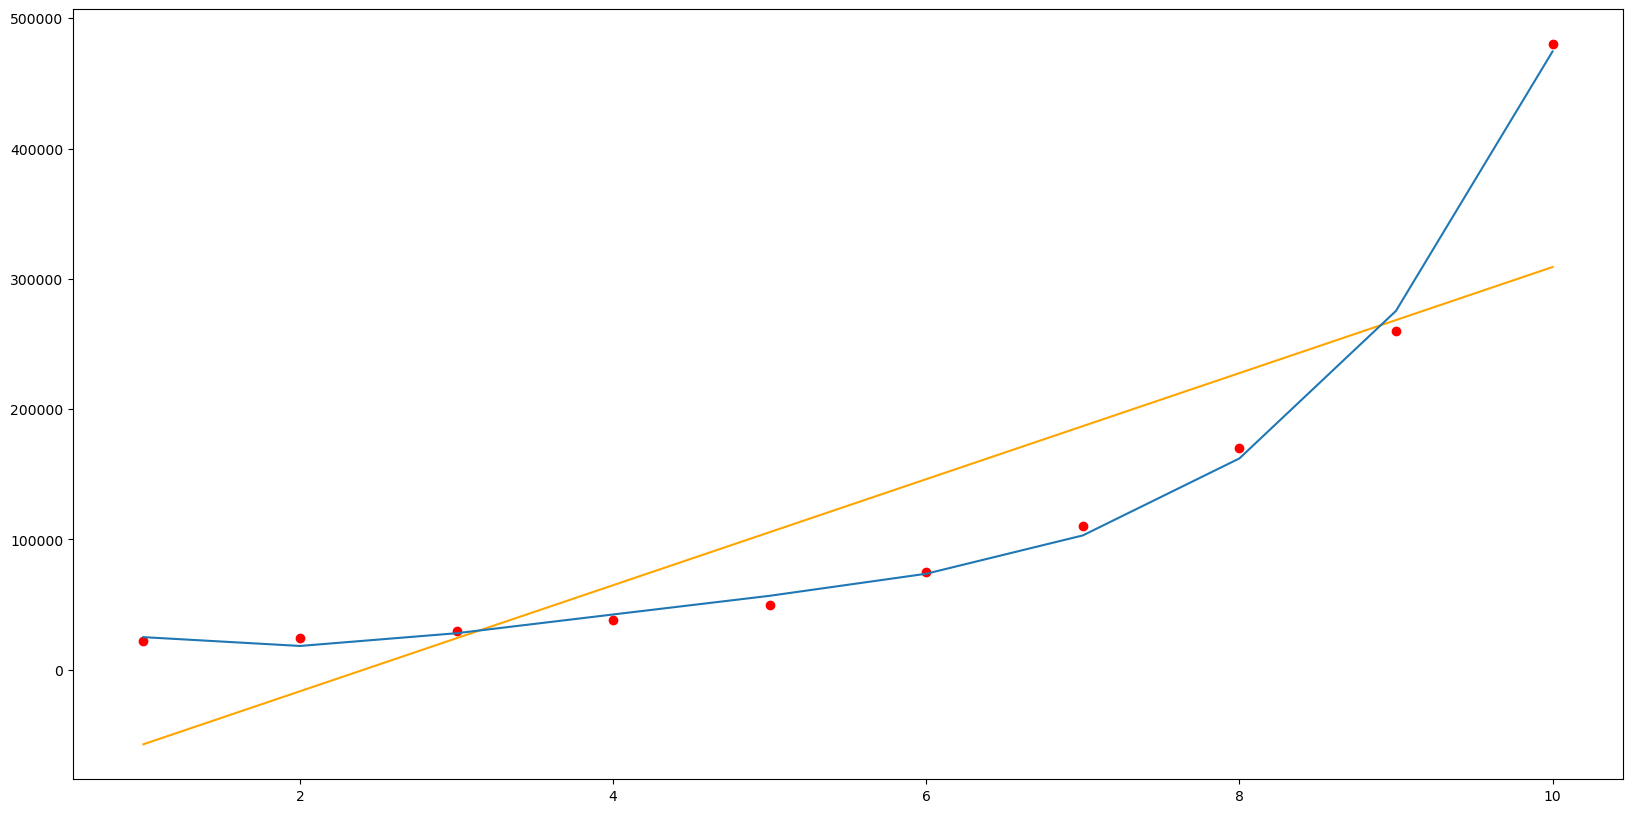

In [102]:
plt.figure(figsize=(20,10))

plt.scatter(level,salary,color='r')
plt.plot(level,regression.predict(level), color='orange')
plt.plot(level,regression2.predict(levelPoly))
plt.show()

### <font color=gray>**Decision Tree Regresyonunu Uygulamak**</font>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [104]:
data = pd.read_csv('positions.csv')
df = data.copy()

In [105]:
df.head()

Position  Level  Salary
0      Software Engineer      1   22000
1  Sr. Software Engineer      2   24000
2        Technology Lead      3   30000
3            Team Leader      4   38000
4                Manager      5   50000

In [106]:
level = df.iloc[:,1:2].values.reshape(-1,1)
salary = df.iloc[:,2].values.reshape(-1,1)

In [110]:
regression = DecisionTreeRegressor()
regression.fit(level,salary)
print(regression.predict([[8.3]]))

[170000.]


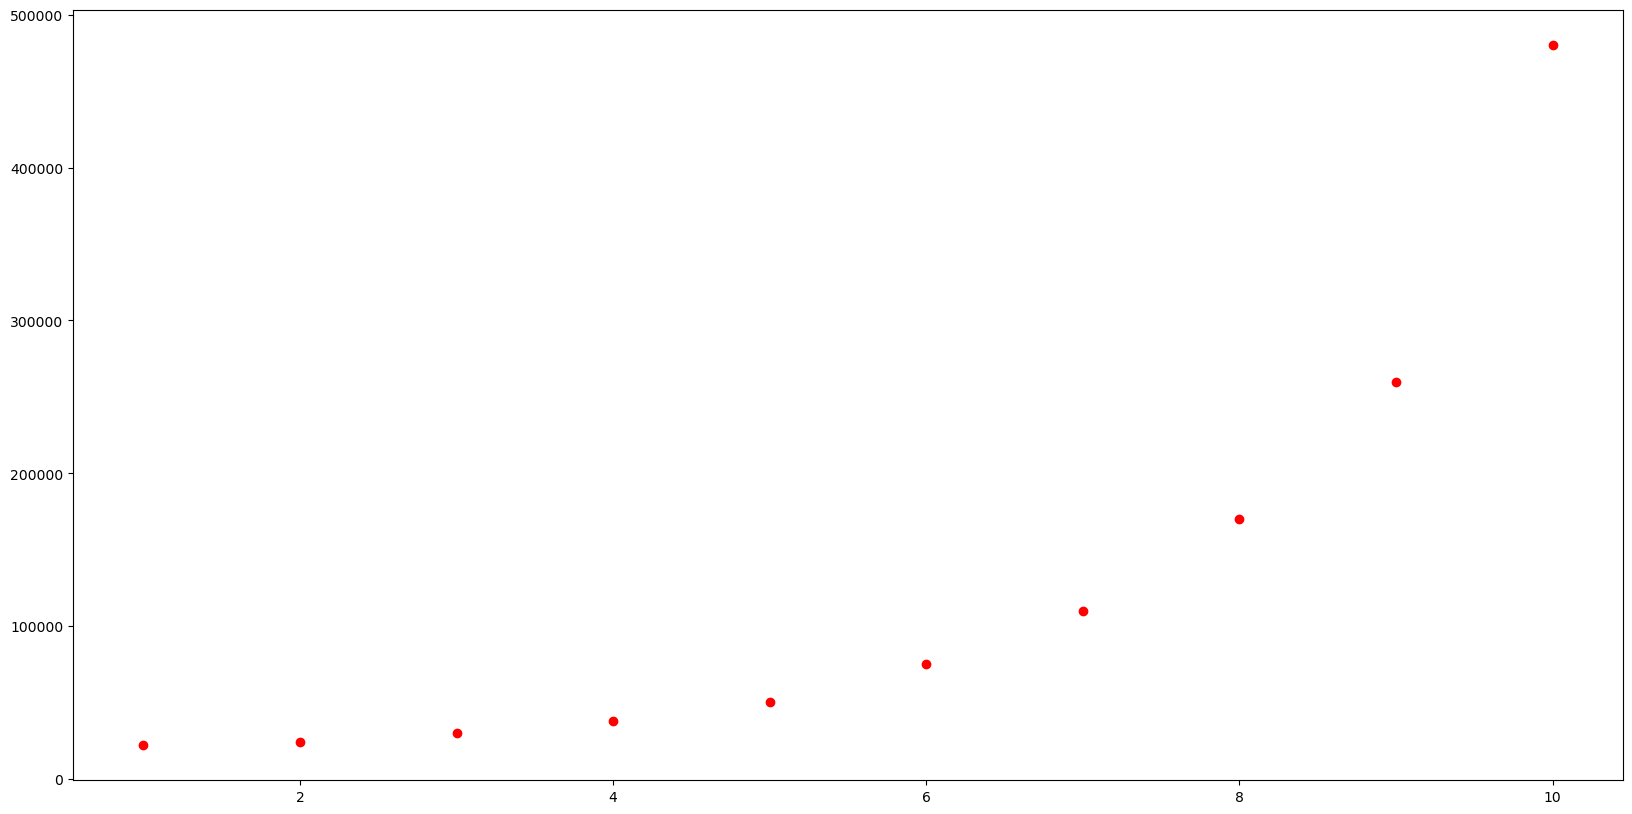

In [113]:
plt.figure(figsize=(20,10))
plt.scatter(level,salary,color='r')
plt.show()

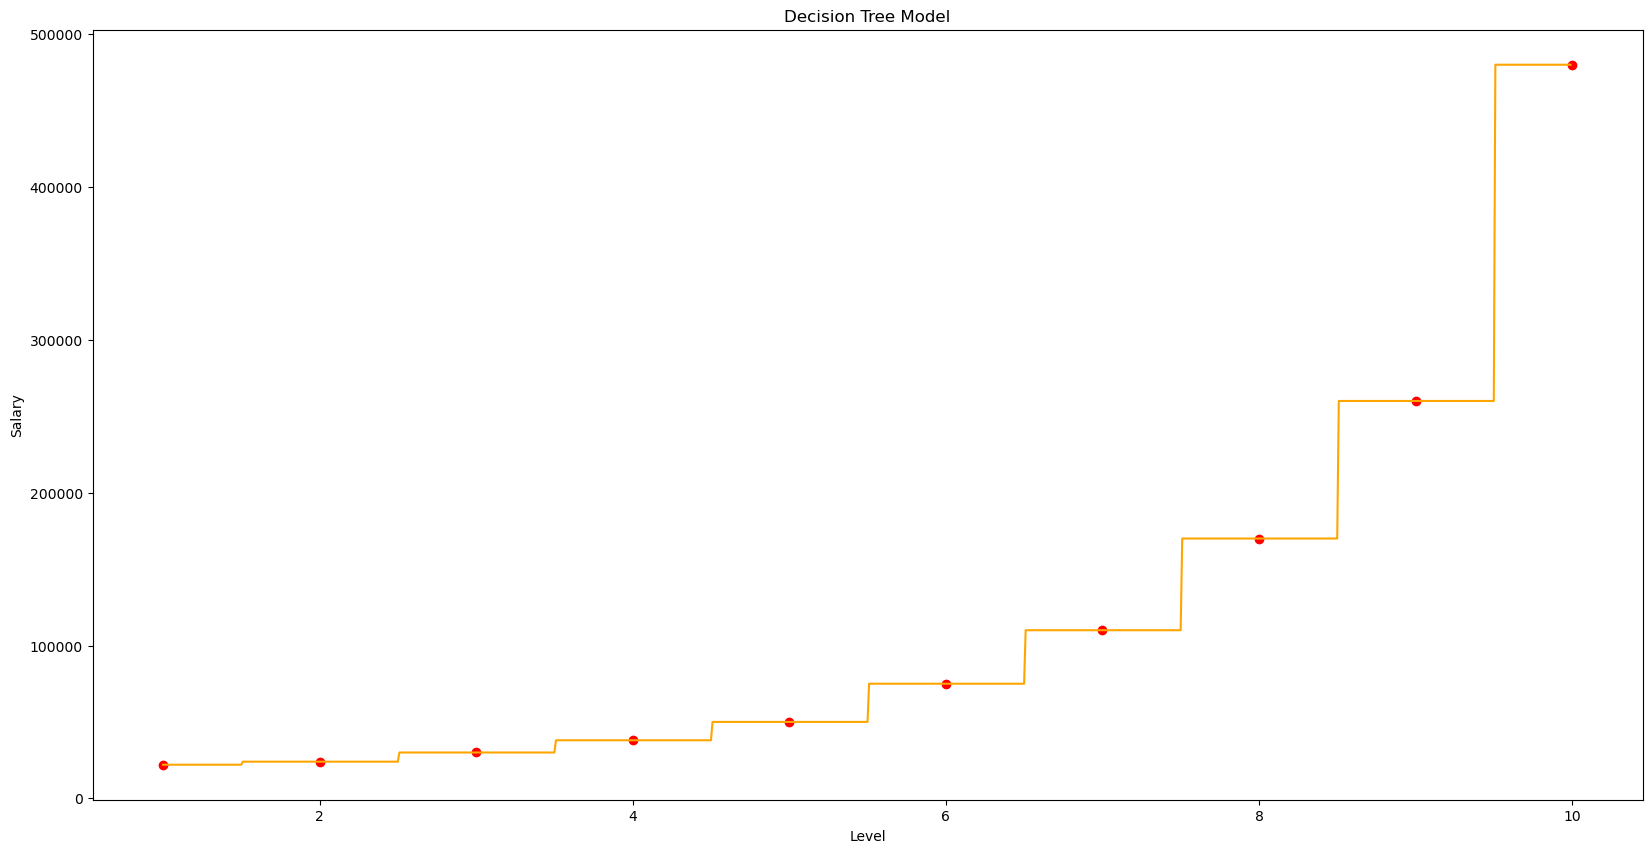

In [117]:
plt.figure(figsize=(20,10))
plt.scatter(level,salary,color='r')
x = np.arange(min(level),max(level),0.01).reshape(-1,1) #0.01 araliklarla ciz
plt.plot(x,regression.predict(x),color='orange')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Decision Tree Model')
plt.show()

### <font color=gray>**Random Forest Regresyon Modelini Uygulamak**</font>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

**Ensemble :** Farkli ya da ayni algoritmayi tekrar tekrar gerceklestirerek yapan modeldir.

In [127]:
data = pd.read_csv('positions.csv')

level = data.iloc[:,1].values.reshape(-1,1)
salary = data.iloc[:,2].values

regression = RandomForestRegressor(n_estimators=10,random_state=0) #kac tane agac yapisi olussun
regression.fit(level,salary)

print(regression.predict([[8.3]]))

[210000.]
